# Uber Picking Up in Manhattan Analysis

## Zhang Qinhao - z5263046

# 1. Introduction:

The main source of this data analysis is the Uber data provided by Data.world. I chose this set of data for my research because of the rising cost of living and the busy urban traffic. Uber needs to arrange the driver's area and time more reasonably, so I chose this set of data to have a positive impact on Uber and passengers.

### 2. Imprting necessary module and dataset

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings; warnings.simplefilter('ignore')
from matplotlib import style
%matplotlib inline

In [220]:
if os.path.isfile("uber-raw-data-may14.csv"):
    filepath = "uber-raw-data-may14.csv"
    print("loading from file")
else:
    filepath = "https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-may14.csv"
    print("loading from the internet")

uber_df = pd.read_csv(filepath)

print("done")

loading from file
done


### 3. Data cleaning

#### We could just take a overlook to this lovely dataset, totally 652435 rows and 4 columns. It is a raw dataset cause we could not get the correct data because of privacy.

In [221]:
uber_df

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
652430,5/31/2014 23:45:00,40.7309,-74.0014,B02764
652431,5/31/2014 23:52:00,40.7528,-73.9798,B02764
652432,5/31/2014 23:55:00,40.7158,-73.9519,B02764
652433,5/31/2014 23:56:00,40.6961,-73.8997,B02764


In [222]:
uber_df.tail()

,Date/Time,Lat,Lon,Base
652430,5/31/2014 23:45:00,40.7309,-74.0014,B02764
652431,5/31/2014 23:52:00,40.7528,-73.9798,B02764
652432,5/31/2014 23:55:00,40.7158,-73.9519,B02764
652433,5/31/2014 23:56:00,40.6961,-73.8997,B02764
652434,5/31/2014 23:59:00,40.7393,-73.9919,B02764


Checking the information of dataset

In [223]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  652435 non-null  object 
 1   Lat        652435 non-null  float64
 2   Lon        652435 non-null  float64
 3   Base       652435 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.9+ MB


In [224]:
type(uber_df)

pandas.core.frame.DataFrame

Setting the date time to the index 

In [225]:
uber_df.set_index(uber_df['Date/Time'],inplace = True)
uber_df.index = pd.to_datetime(uber_df.index)
del uber_df['Date/Time']
uber_df.head()

,Lat,Lon,Base
Date/Time,,,
2014-05-01 00:02:00,40.7521,-73.9914,B02512
2014-05-01 00:06:00,40.6965,-73.9715,B02512
2014-05-01 00:15:00,40.7464,-73.9838,B02512
2014-05-01 00:17:00,40.7463,-74.0011,B02512
2014-05-01 00:17:00,40.7594,-73.9734,B02512


Splitting the datetime into other different columns for processing data easily

In [226]:
uber_df['Date'] = uber_df.index.day
uber_df['Weekday'] = uber_df.index.weekday
uber_df['Hour'] = uber_df.index.hour
uber_df['Minute'] = uber_df.index.minute
uber_df.head()

,Lat,Lon,Base,Date,Weekday,Hour,Minute
Date/Time,,,,,,,
2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,3,0,2
2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,3,0,6
2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,3,0,15
2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,3,0,17
2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,3,0,17


### 4. Data Visualization

# a. Uber Daily Statistics

First, we calculate the daily Uber usage in mid-April, and then draw a line chart according to the daily usage to reflect the trend of Uber vehicle change. Next, use the 5-day moving average as a trend to see the changes in Uber usage in April. 

[(1, 23375), (2, 24235), (3, 22234), (4, 13918), (5, 17859), (6, 19300), (7, 21891), (8, 27513), (9, 26385), (10, 22550), (11, 14901), (12, 17470), (13, 19498), (14, 22218), (15, 26301), (16, 32493), (17, 22294), (18, 16508), (19, 18315), (20, 20860), (21, 23508), (22, 26802), (23, 26465), (24, 14651), (25, 10841), (26, 10202), (27, 17004), (28, 22240), (29, 24930), (30, 24413), (31, 21261)]


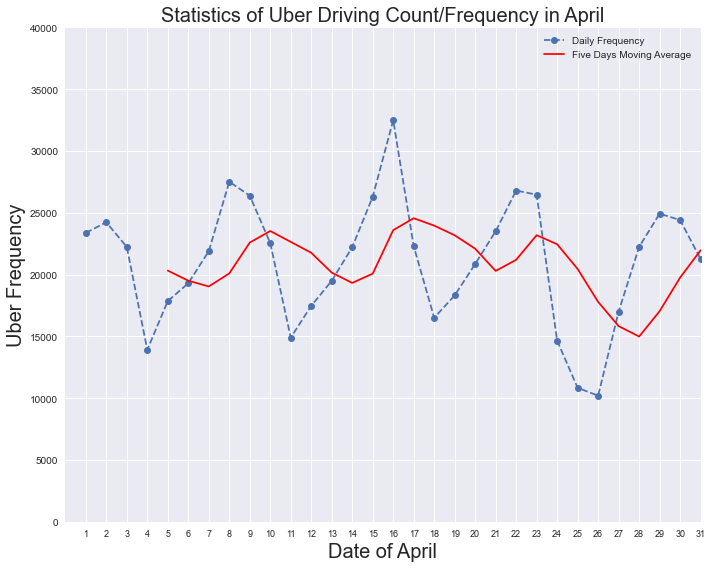

In [227]:
Date_lists = list(uber_df['Date'])
Date_count_set = set(Date_lists)
Date_count_list = list()
for k in Date_count_set:
    Date_count_list.append((k,Date_lists.count(k)))
print (Date_count_list)
Date_count = pd.DataFrame(Date_count_list)
Date_count['SMA_5'] = Date_count[1].rolling(5).mean()

plt.style.use('seaborn')
plt.figure(figsize = (10,8))
Date_line, = plt.plot(Date_count[0],Date_count[1],'--',marker = 'o')
Moving_line, = plt.plot(Date_count[0],Date_count['SMA_5'],'r')
plt.ylabel('Uber Frequency',size = 20)
plt.xlabel('Date of April',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency in April',size = 20)
plt.axis([0,31,0,40000])
plt.xticks(Date_count[0], fontsize=9)
plt.legend(loc='best',handles=[Date_line,Moving_line],labels=['Daily Frequency','Five Days Moving Average'])
plt.tight_layout()

The 5-day average feedback showed that the usage of Uber in the middle of the month was lower than that in the beginning of the month, but the usage of Uber at the end of the month was greatly improved. We continue to rank daily usage. Indeed, 26th to 30th are in the top five.

In [228]:
Date_count = Date_count.fillna(0)
Date_count.sort_values(by = 1,ascending = False).head(5)

,0,1,SMA_5
15,16,32493,23596.0
7,8,27513,20096.2
21,22,26802,21198.6
22,23,26465,23190.0
8,9,26385,22589.6


Less frequent using Uber of days in the middle of the month

In [229]:
Date_count.sort_values(by = 1).head(5)

,0,1,SMA_5
25,26,10202,17792.2
24,25,10841,20453.4
3,4,13918,0.0
23,24,14651,22457.2
10,11,14901,22648.0


# b. Uber Hourly statistics

Uber frequencies should be higher in the morning and evening hours, so we draw a time-based frequency histogram.

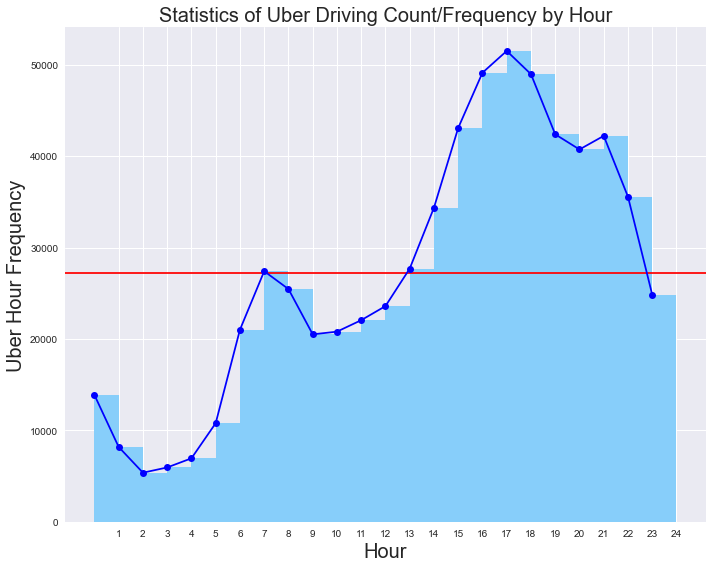

In [230]:
Hour_count = uber_df['Hour']
Hour_count.hist(bins=24, figsize=(10,8),range= (0,24),color = '#87CEFA')
plt.xticks(range(1,25))

def counts(i):
    return len(i)
Hour = uber_df.groupby('Hour').apply(counts)
plt.axhline(y = Hour.mean(), color='r')
plt.plot(Hour,marker= 'o',color = 'b')
plt.ylabel('Uber Hour Frequency',size = 20)
plt.xlabel('Hour',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency by Hour',size = 20)
plt.tight_layout()

The use of vehicles from 4 p.m. to 9 p.m. is significantly higher than usual, which also confirms our conjecture.

# c. Weekday Uber Frequency

We also need to look at weekly usage. Uber usage on weekdays from Monday to Friday is significantly higher than on weekends, which indicates that people tend to use more Uber on commutes and on weekends they may prefer to drive by themselves.

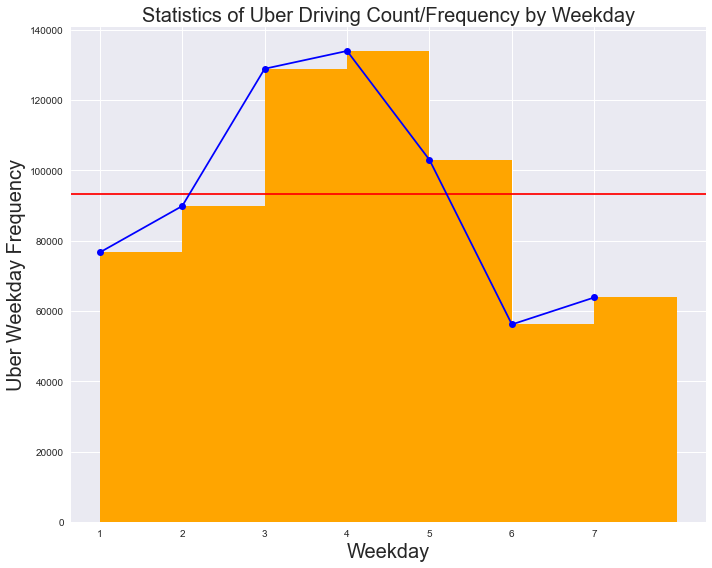

In [231]:
uber_df.loc[uber_df['Weekday'] == 0,'Weekday']=7

Weekday_count = uber_df['Weekday']
Weekday_count.hist(bins=7, figsize=(10,8),range= (1,8),color = 'orange')
plt.xticks(range(1,8))

Weekday = uber_df.groupby('Weekday').apply(counts)
plt.axhline(y = Weekday.mean(), color='r')
plt.plot(Weekday,marker= 'o',color = 'b')
plt.ylabel('Uber Weekday Frequency',size = 20)
plt.xlabel('Weekday',size = 20)
plt.title('Statistics of Uber Driving Count/Frequency by Weekday',size = 20)
plt.tight_layout()

# d. Heat map of hour Uber Picking up in everyday

Finally, for the analysis of time, we separated the working day and time to draw a thermogram to see the Uber usage per hour per day.

In [232]:
Corr_data = uber_df.groupby('Weekday Hour'.split()).apply(counts).unstack()
Corr_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
1,715,431,303,543,864,1631,3416,4401,3616,2647,...,4192,5247,6169,6713,5344,4712,4980,4503,3149,1759
2,838,477,334,573,846,1547,3618,4864,4046,2872,...,5016,6211,7287,7808,7138,5902,6015,5782,3839,2041
3,1426,831,584,849,1291,2425,5080,6697,6318,4550,...,6357,7852,9046,10686,9738,8424,8474,9023,7143,3930
4,2004,1156,758,1005,1286,2025,4327,5665,5072,3806,...,6789,8384,9010,9543,11081,10395,8847,9392,8859,6774
5,3878,2249,1524,1205,958,1027,1203,1588,2144,2579,...,4950,7104,8472,7518,8145,6419,5918,7027,7901,7416
6,4247,2576,1565,1144,723,620,683,911,1252,1759,...,3238,3775,4088,3774,3282,2881,2782,2809,2230,1487
7,767,466,304,627,977,1514,2688,3287,3012,2294,...,3821,4514,5055,5466,4237,3654,3715,3681,2435,1429


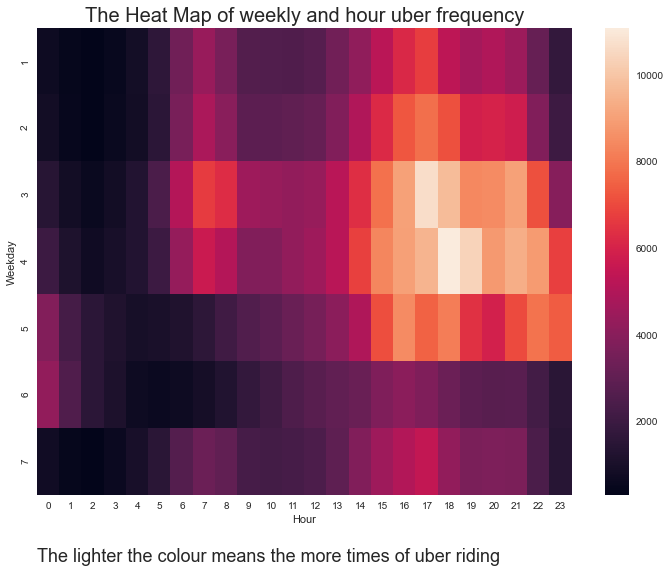

In [233]:
plt.figure(figsize =(10,8))
sns.heatmap(Corr_data)
plt.title('The Heat Map of weekly and hour uber frequency',size =20)
plt.text(0,8,'The lighter the colour means the more times of uber riding',size =18)
plt.tight_layout()

# e. Uber Analysis based on Base

Organize and sort Base data

In [234]:
Base_data = pd.DataFrame(uber_df.groupby('Base').apply(counts))
Base_data.sort_values(by = 0)

,0
Base,
B02764,9504
B02512,36765
B02617,122734
B02682,222883
B02598,260549


Draw a frequency histogram in the order of Base addresses to see which area has more Uber usage

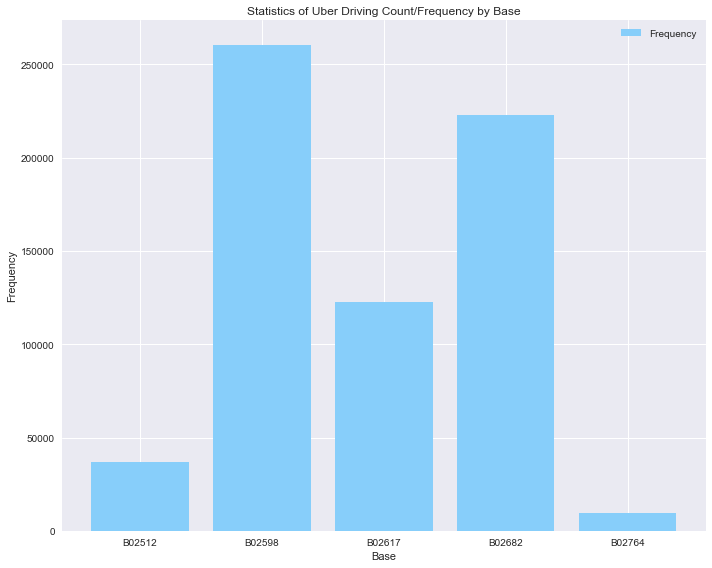

In [235]:
plt.figure(figsize=(10, 8))
plt.bar(Base_data.index,Base_data[0],label ='Frequency',color ='#87CEFA')
plt.xlabel('Base')
plt.ylabel('Frequency')
plt.title('Statistics of Uber Driving Count/Frequency by Base')
plt.legend(loc="upper right")
plt.tight_layout()

# e. Uber Analysis based on Location

The data includes the longitude and latitude of Uber's call location. First, we roughly count the average calling location.

''

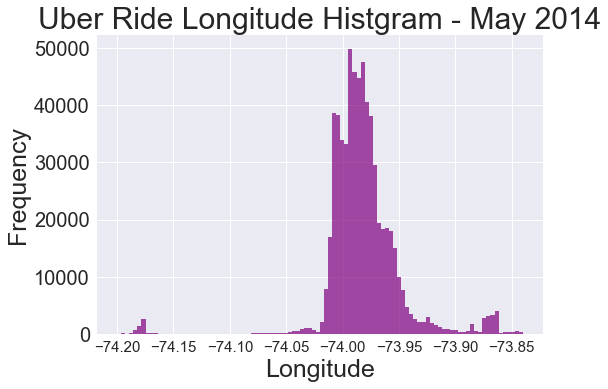

In [236]:
plt.hist(uber_df['Lon'], bins = 100, range = (-74.2,-73.84), color = "Purple", alpha = 0.7)
plt.xlabel('Longitude', size = 25)
plt.ylabel('Frequency', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.title('Uber Ride Longitude Histgram - May 2014', size = 30)
;

#### Uber Ride Longitude Line Graph - May 2014

''

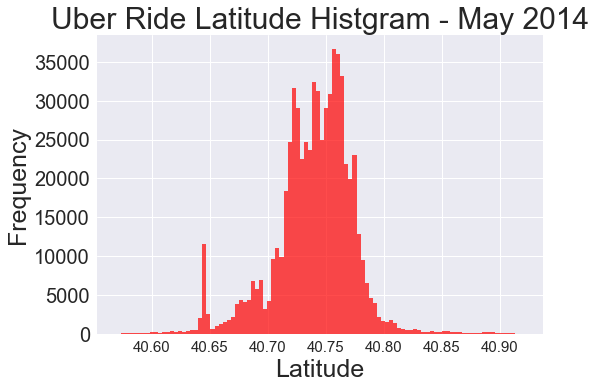

In [237]:
plt.hist(uber_df['Lat'], bins = 100, range = (40.57, 40.92), color = "Red", alpha = 0.7)
plt.xlabel('Latitude', size = 25)
plt.ylabel('Frequency', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.title('Uber Ride Latitude Histgram - May 2014', size = 30)
;

Drawing latitude and longitude into a graph can better highlight the relationship between the two.Drawing latitude and longitude into a graph can better highlight the relationship between the two. The deviation of Latitude is negative; the deviation of longtitude is positive.

''

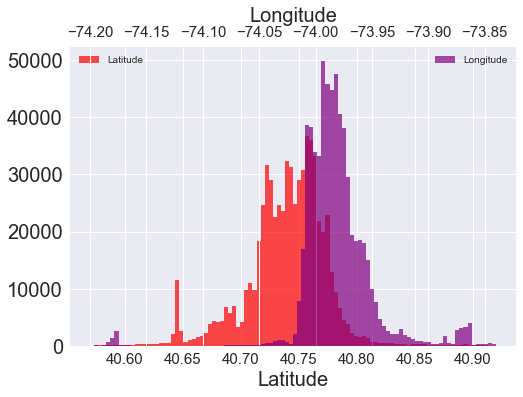

In [238]:
plt.hist(uber_df['Lat'], bins = 100, range = (40.57, 40.92), rwidth = 1, color = "Red", alpha = 0.7, label = 'Latitude')
plt.xlabel("Latitude", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.legend(loc="upper left")
plt.twiny()
plt.hist(uber_df['Lon'], bins = 100, range = (-74.2,-73.84), rwidth = 1, color = "Purple", alpha = 0.7, label = 'Longitude')
plt.xlabel("Longitude", size = 20)
plt.xticks(size = 15)
plt.legend(loc="upper right")
;

Finally, we use latitude and longitude as the horizontal and vertical coordinates to roughly draw the map used by Uber in Manhattan. Interestingly, this map is basically a brief version of the map of Manhattan, which also reflects the Uber usage in this area can well indicate the degree of urban development.

As most of the locations are concentrated in a small area at the lower left, we draw that small area separately.

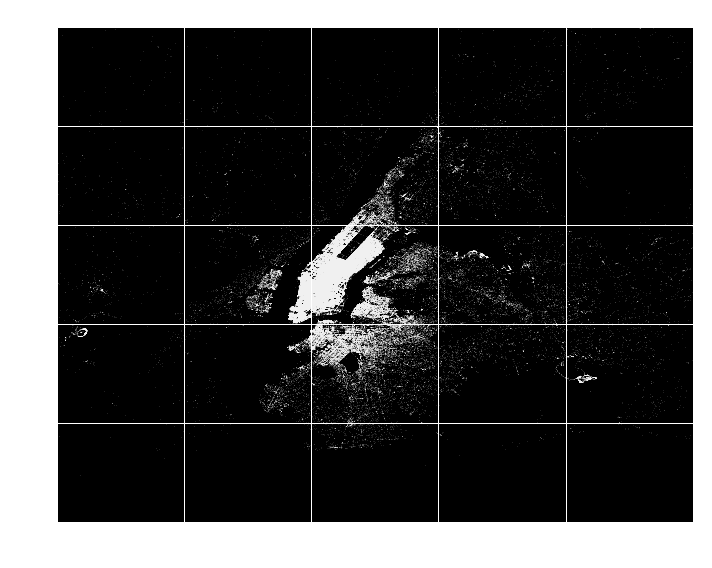

In [239]:
plt.figure(figsize =(10,8))
plt.style.use('dark_background')
plt.plot(uber_df['Lon'], uber_df['Lat'],'.',ms =0.7, alpha = 0.7,color ='w')
plt.xlim(-74.2, -73.7)
plt.ylim(40.5, 41.0)
plt.xlabel('Longitude', size = 20)
plt.ylabel('Latitude', size = 20)
plt.title('Uber picking up plot in Manhttan(Location)', size = 20)
plt.tight_layout()

# Thank you